# 讀取姿勢特徵

In [1]:
import os
import numpy as np
import pandas as pd

# 指定資料夾路徑
folder_path1 = 'data/Yu_Darvish_FF_videos_4S/features'
folder_path2 = 'data/Yu_Darvish_FS_videos_4S/features'
folder_path3 = 'data/Yu_Darvish_SL_videos_4S/features'
csv1_path = 'data/Downloads/Yu_Darvish_FF_with_videos.csv'
csv2_path = 'data/Downloads/Yu_Darvish_FS_with_videos.csv'
csv3_path = 'data/Downloads/Yu_Darvish_SL_with_videos.csv'
file_number = 200  # 假設每個資料夾有200個檔案

all_features = []
idx = 0
error_idx = []
for folder_path in [folder_path1, folder_path2, folder_path3]:
    for i in range(1, file_number+1):
        file_name = f'pitch_{i:04d}_keyframe_feats.npy'  # 正確的四位數格式
        try:
            all_features.append(np.load(os.path.join(folder_path, file_name)).T)
        except Exception as e:
            print(f"檔案 {file_name} 在資料夾 {folder_path} 中不存在或無法讀取。錯誤：{e}")
            error_idx.append(idx)
        idx += 1

# 可選：顯示第一筆資料的形狀來確認內容
print(f"共有 {len(all_features)} 筆資料")
if all_features:
    print("第一筆資料形狀：", all_features[0].shape)
print(f"錯誤索引：{error_idx}")


檔案 pitch_0021_keyframe_feats.npy 在資料夾 data/Yu_Darvish_FS_videos_4S/features 中不存在或無法讀取。錯誤：[Errno 2] No such file or directory: 'data/Yu_Darvish_FS_videos_4S/features\\pitch_0021_keyframe_feats.npy'
檔案 pitch_0054_keyframe_feats.npy 在資料夾 data/Yu_Darvish_SL_videos_4S/features 中不存在或無法讀取。錯誤：[Errno 2] No such file or directory: 'data/Yu_Darvish_SL_videos_4S/features\\pitch_0054_keyframe_feats.npy'
共有 598 筆資料
第一筆資料形狀： (60, 4)
錯誤索引：[220, 453]


# 讀取標籤

In [2]:
csv_feat = pd.DataFrame()
for csv_path in [csv1_path, csv2_path, csv3_path]:
    csv_feat = pd.concat([csv_feat, pd.read_csv(csv_path).head(200)],ignore_index=True)
csv_feat = csv_feat.drop(index=error_idx)
print(f"csv_feat shape: {csv_feat.shape}")
display(csv_feat.head())

csv_feat shape: (598, 119)


,video_filename,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
0,pitch_0001.mp4,FF,2022/9/30,91.3,-2.31,5.34,"Darvish, Yu",543281,506433,NaN,...,1.0,1.27,0.37,0.37,38.7,NaN,NaN,NaN,NaN,NaN
1,pitch_0002.mp4,FF,2022/9/30,91.9,-2.02,5.54,"Darvish, Yu",543281,506433,NaN,...,1.0,1.28,0.51,0.51,44.1,NaN,NaN,NaN,NaN,NaN
2,pitch_0003.mp4,FF,2022/9/30,94.2,-2.13,5.39,"Darvish, Yu",656024,506433,field_out,...,2.0,1.09,0.42,0.42,40.3,NaN,NaN,NaN,NaN,NaN
3,pitch_0004.mp4,FF,2022/9/30,93.7,-2.54,5.25,"Darvish, Yu",660162,506433,double,...,1.0,1.19,0.84,-0.84,32.1,NaN,NaN,NaN,NaN,NaN
4,pitch_0005.mp4,FF,2022/9/30,92.3,-2.56,5.26,"Darvish, Yu",657757,506433,NaN,...,1.0,1.22,0.86,-0.86,32.4,NaN,NaN,NaN,NaN,NaN


In [3]:
csv_feat['description']

0                 ball
1                 ball
2        hit_into_play
3        hit_into_play
4                 foul
            ...       
595      hit_into_play
596               ball
597      called_strike
598               ball
599    swinging_strike
Name: description, Length: 598, dtype: object

# 定義X,y

In [4]:
X = np.array(all_features)
y = csv_feat['description']
print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (598, 60, 4), y shape: (598,)


# 類別分佈（Label distribution）希望類別平衡

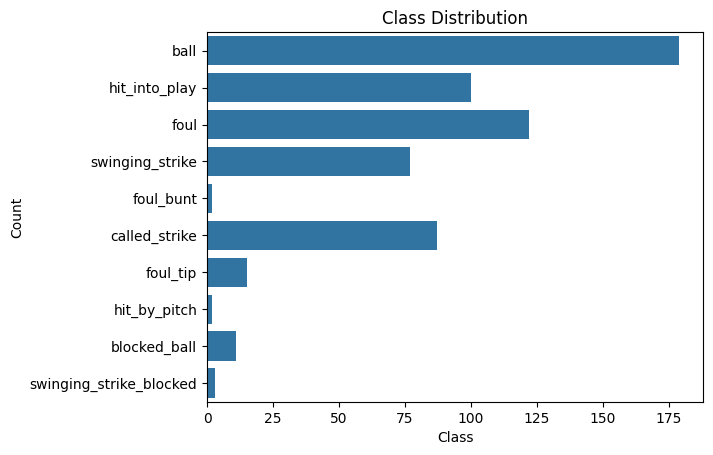

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(y)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


# 這裡將少數類別去除

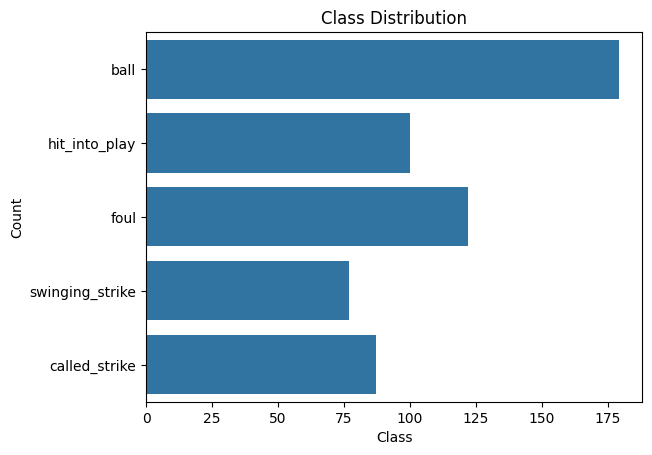

被刪除的 row index: [11, 58, 73, 79, 98, 124, 168, 191, 207, 223, 235, 246, 258, 273, 274, 286, 297, 307, 329, 336, 340, 354, 356, 357, 372, 376, 381, 388, 394, 406, 493, 528, 555]
X_filtered shape: (565, 60, 4), y_filtered shape: (565,)


In [6]:
import pandas as pd

# 假設 y 是一個 DataFrame，且 y['description'] 是分類欄位
# 計算每個類別的出現次數
class_counts = y.value_counts()

# 計算所有類別出現次數的平均值
mean_count = class_counts.mean()

# 找出出現次數大於等於平均值的類別
valid_classes = class_counts[class_counts >= mean_count].index

# 過濾 y，只保留那些類別在 valid_classes 裡的資料
y_filtered = y[y.isin(valid_classes)].reset_index(drop=True)
sns.countplot(y_filtered)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()
deleted_index = y[~y.isin(valid_classes)].index.tolist()
print("被刪除的 row index:", deleted_index)
X_filtered = np.delete(X, deleted_index, axis=0)
print(f"X_filtered shape: {X_filtered.shape}, y_filtered shape: {y_filtered.shape}")

# 特徵的範圍與分佈

In [7]:
X_reshaped = X_filtered.reshape(-1, 4)  # 合併所有樣本與時間
for i in range(4):
    print(f"features {i} → min: {X_reshaped[:, i].min():.2f}, max: {X_reshaped[:, i].max():.2f}, mean: {X_reshaped[:, i].mean():.2f}, std: {X_reshaped[:, i].std():.2f}")


features 0 → min: 0.42, max: 82.32, mean: 24.25, std: 10.94
features 1 → min: 0.44, max: 1.00, mean: 0.97, std: 0.04
features 2 → min: 4.14, max: 179.56, mean: 134.43, std: 30.10
features 3 → min: 0.00, max: 0.40, mean: 0.10, std: 0.03


# 訓練測試切分

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# X 做標準化轉換 

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

# y 做label encoding

In [10]:
from sklearn.preprocessing import LabelEncoder

# 初始化 LabelEncoder
le = LabelEncoder()

# 對 y_train 進行 fit 和 transform
y_train_encoded = le.fit_transform(y_train)

# 對 y_test 只做 transform（使用相同的編碼規則）
y_test_encoded = le.transform(y_test)


# 特徵的箱型圖檢查 檢查離群值

# 

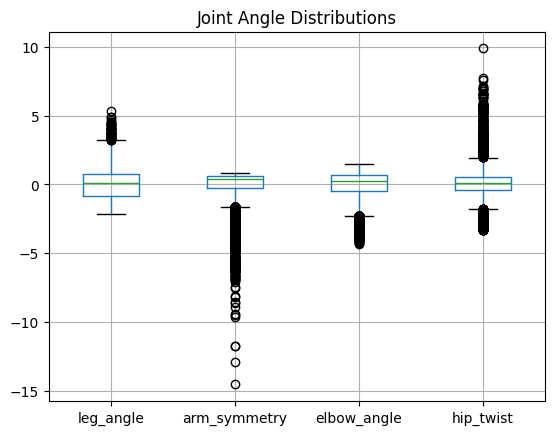

In [11]:
import pandas as pd
df = pd.DataFrame(X_train.reshape(-1, 4), columns=["leg_angle", "arm_symmetry", "elbow_angle", "hip_twist"])
df.boxplot()
plt.title("Joint Angle Distributions")
plt.show()


# 單一樣本或幾筆樣本的角度變化趨勢（時間序列可視化）

# 希望一樣的特徵 在不同樣本 都有類似趨勢

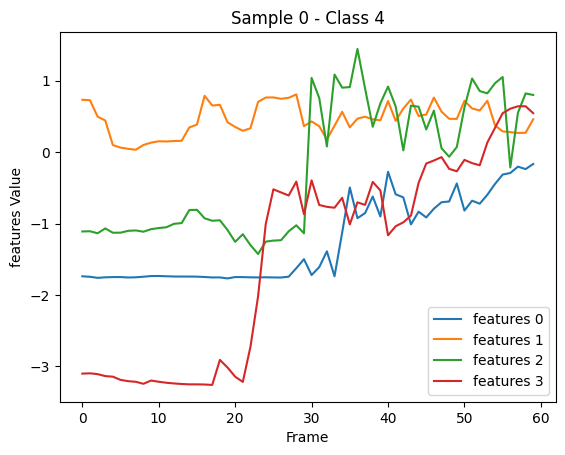

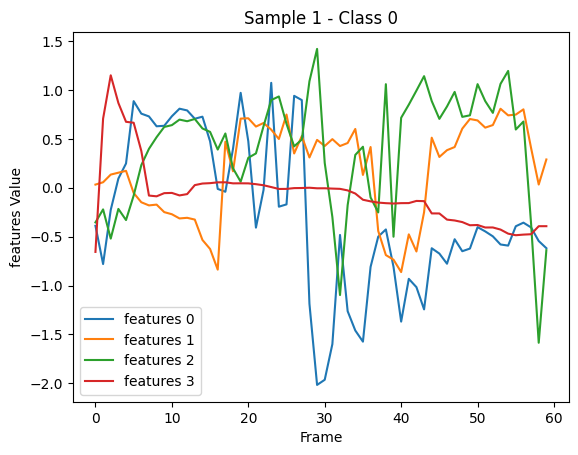

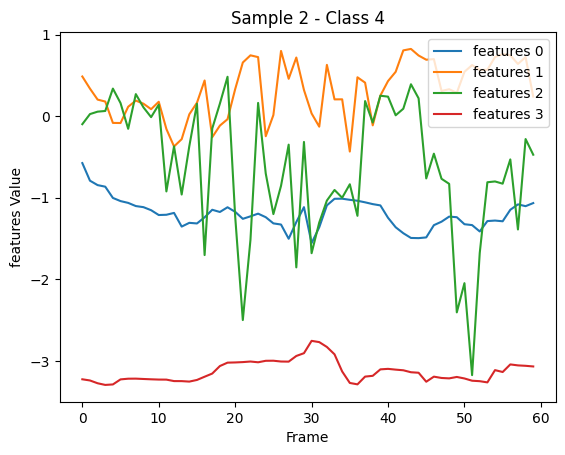

In [12]:
for sample_idx in [0,1,2]:
    for i in range(4):
        plt.plot(X_train[sample_idx, :, i], label=f"features {i}")
    plt.title(f"Sample {sample_idx} - Class {y_train_encoded[sample_idx]}")
    plt.xlabel("Frame")
    plt.ylabel("features Value")
    plt.legend()
    plt.show()


# 根據類別分組樣本 看每組樣本的平均變化 希望區分的開

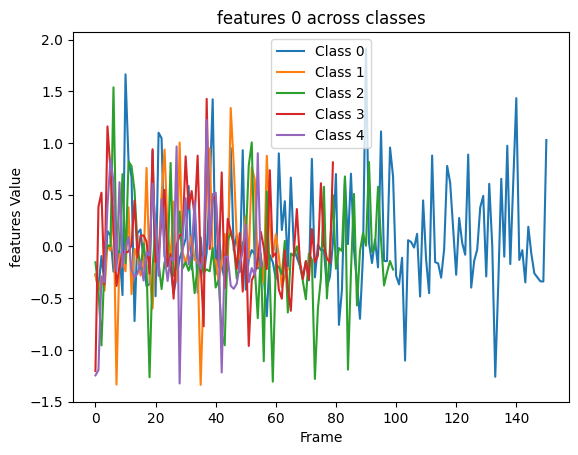

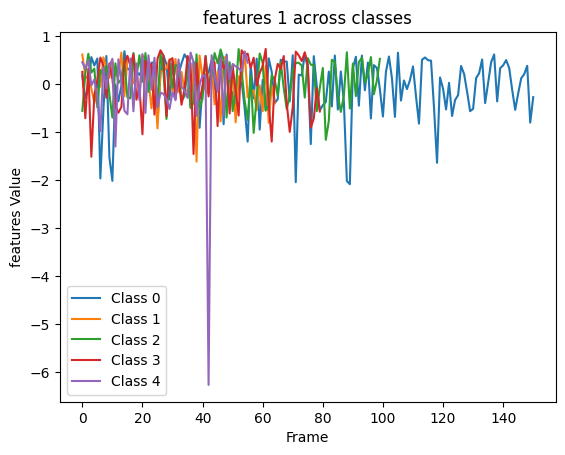

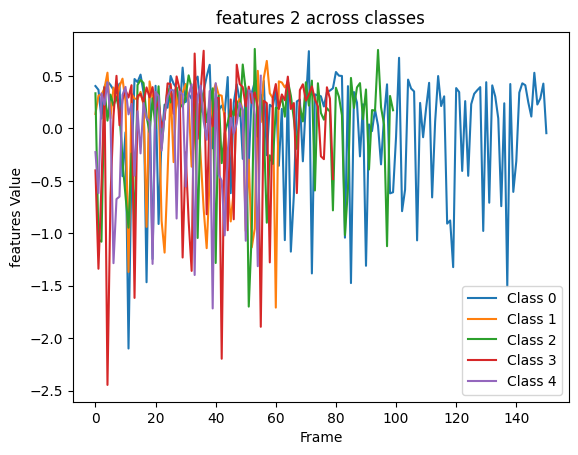

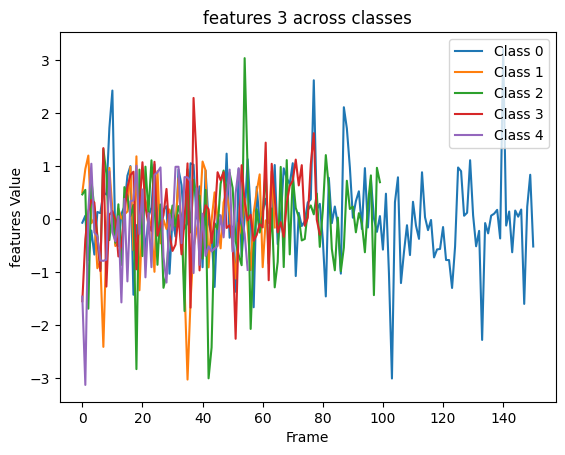

In [13]:
for feature_idx in range(4):
    for c in np.unique(y_train_encoded):
        idx = np.where(y_train_encoded == c)[0]#每類挑多組樣本
        plt.plot(X_train[idx, :, feature_idx].mean(axis=1), label=f"Class {c}")  # 每類多組樣本取平均
    plt.title(f"features {feature_idx} across classes")
    plt.xlabel("Frame")
    plt.ylabel("features Value")
    plt.legend()
    plt.show()


# 降維觀察 希望資料區分的開

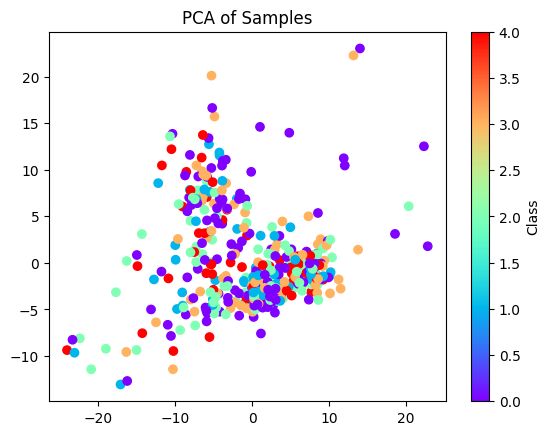

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

X_flat = X_train.reshape(X_train.shape[0], -1)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_flat)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_encoded, cmap='rainbow')
plt.title("PCA of Samples")
plt.colorbar(label='Class')
plt.show()

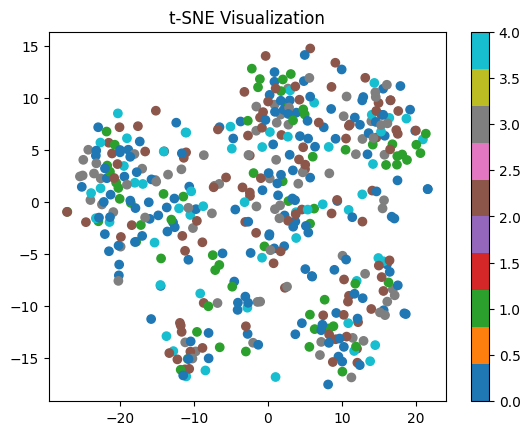

In [15]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

X_flat = X_train.reshape(X_train.shape[0], -1)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_flat)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train_encoded, cmap='tab10')
plt.title("t-SNE Visualization")
plt.colorbar()
plt.show()


# 根據Y分組 觀察 希望看到的是組間差異大 組內差異小 F= MSwithin/MSbetween

# 考量單禎的情況

In [16]:
mid_frame_idx = X.shape[1]//2
print(f"中間幀索引: {mid_frame_idx}")
import numpy as np
from scipy.stats import f_oneway

for col in range(4):  # 假設你只針對前4個特徵做
    groups = [X[y == label, mid_frame_idx, col].reshape(-1) for label in np.unique(y)]  # flatten 成一維
    f_stat, p_val = f_oneway(*groups)
    print(f'特徵:{col} -> F={f_stat:.4f}, p={p_val:.4f}')


中間幀索引: 30
特徵:0 -> F=0.6900, p=0.7183
特徵:1 -> F=2.0632, p=0.0309
特徵:2 -> F=0.4629, p=0.8994
特徵:3 -> F=0.3542, p=0.9559


# 考量多禎的情況 取平均 希望F_STAT超過1 p_val小於0.05

In [17]:
import numpy as np
from scipy.stats import f_oneway
f_stat_dict ={}
p_val_dict = {}
for frame_idx in range(60):  # 對每一幀進行分析
    for col in range(4):  # 假設你只針對前4個特徵做
        groups = [X[y == label, mid_frame_idx, col].reshape(-1) for label in np.unique(y)]  # flatten 成一維
        f_stat, p_val = f_oneway(*groups)
        try:
            f_stat_dict[col] += f_stat
            p_val_dict[col] += p_val
        except:
            f_stat_dict[col] = f_stat
            p_val_dict[col] = p_val
f_stat_dict = {k: v / 60 for k, v in f_stat_dict.items()}
p_val_dict = {k: v / 60 for k, v in p_val_dict.items()}
print('各特徵的f_stat:', f_stat_dict)
print('各特徵的p_val:', p_val_dict)


各特徵的f_stat: {0: 0.6899920729235255, 1: 2.063196381220549, 2: 0.4629151387758909, 3: 0.3541843860361312}
各特徵的p_val: {0: 0.7183191619862932, 1: 0.0309094839766979, 2: 0.8994369210588148, 3: 0.9559275129247647}


# 建模 KNN DTW MODEL

In [18]:
X_train.shape, X_test.shape, y_train_encoded.shape, y_test_encoded.shape

((452, 60, 4), (113, 60, 4), (452,), (113,))

c:\Users\ricky\miniconda3\envs\pitch_pose_tcn\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


Accuracy: 0.23008849557522124
              precision    recall  f1-score   support

           0       0.25      0.64      0.36        28
           1       0.18      0.09      0.12        22
           2       0.08      0.05      0.06        22
           3       0.29      0.20      0.24        20
           4       0.25      0.05      0.08        21

    accuracy                           0.23       113
   macro avg       0.21      0.21      0.17       113
weighted avg       0.21      0.23      0.18       113

Confusion Matrix:


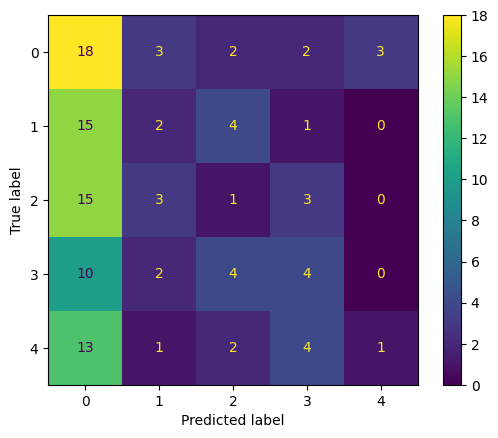

In [19]:
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
import warnings
warnings.filterwarnings("ignore")

# 建立 KNN 分類器，使用 DTW 距離，k=3
knn_dtw = KNeighborsTimeSeriesClassifier(n_neighbors=3, metric="dtw")

# 訓練
knn_dtw.fit(X_train, y_train_encoded)

# 預測
y_pred = knn_dtw.predict(X_test)

# 評估
print("Accuracy:", accuracy_score(y_test_encoded, y_pred))
print(classification_report(y_test_encoded, y_pred))
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(y_test_encoded, y_pred)
plt.show()


In [20]:
le.classes_

array(['ball', 'called_strike', 'foul', 'hit_into_play',
       'swinging_strike'], dtype=object)

In [21]:
'''
以下是這些棒球術語的中文翻譯與簡要說明：

ball - 壞球
投手投出的球未進入好球帶，且打者沒有揮棒。

called_strike - 好球（被判好球）
球進入好球帶，但打者未揮棒，由主審判定為好球。

foul - 界外球
打者擊球後，球落入界外區。

foul_bunt - 短打界外球
打者嘗試短打但球落入界外，若是兩好球後再發生則會被判三振。

foul_tip - 擦棒球
打者略微碰到球，球直接被捕手接住，算作好球。

hit_by_pitch - 觸身球
打者被投出的球擊中身體，通常可直接上一壘。

hit_into_play - 擊球進場
打者擊出有效球並進入場內，有可能形成安打或被守備處理。

swinging_strike - 揮棒落空
打者揮棒但沒有打中球，算作好球。
'''

'\n以下是這些棒球術語的中文翻譯與簡要說明：\n\nball - 壞球\n投手投出的球未進入好球帶，且打者沒有揮棒。\n\ncalled_strike - 好球（被判好球）\n球進入好球帶，但打者未揮棒，由主審判定為好球。\n\nfoul - 界外球\n打者擊球後，球落入界外區。\n\nfoul_bunt - 短打界外球\n打者嘗試短打但球落入界外，若是兩好球後再發生則會被判三振。\n\nfoul_tip - 擦棒球\n打者略微碰到球，球直接被捕手接住，算作好球。\n\nhit_by_pitch - 觸身球\n打者被投出的球擊中身體，通常可直接上一壘。\n\nhit_into_play - 擊球進場\n打者擊出有效球並進入場內，有可能形成安打或被守備處理。\n\nswinging_strike - 揮棒落空\n打者揮棒但沒有打中球，算作好球。\n'